<a href="https://colab.research.google.com/github/ShayHav/MachineLearning/blob/main/Exercise%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex4_imgae_classification


1.   Shay Havivyan, 315367995
2.   Shahar Lankry, 208600395

In [ ]:
from google.colab import files
# upload faces files using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# extract the files
!unzip '/content/Faces.zip'
 

Saving Faces.zip to Faces (1).zip
User uploaded file "Faces.zip" with length 619094 bytes
Archive:  /content/Faces.zip
replace NoSunglasses/choon_straight_happy_open_4.pgm? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from skimage.io import imread_collection
from sklearn.model_selection import train_test_split

In [ ]:
# reading the images of people without sunglass to numpy array
no_glasses_images = imread_collection('/content/NoSunglasses/*.pgm')
no_glasses_images = np.array(no_glasses_images)

# reading the images of people with sunglass to numpy array
glasses_images = imread_collection('/content/Sunglassess/*.pgm')
glasses_images = np.array(glasses_images)

print(f'shape of sunglasses image {glasses_images.shape} and shape of no sunglasses images {no_glasses_images.shape}')

# concatenating both array to one array to work with
images = np.concatenate((glasses_images, no_glasses_images))

# creating the result where image with sunglasses is class 1 and image without sunglass is class 0
classes = np.concatenate((np.ones(glasses_images.shape[0]), np.zeros(no_glasses_images.shape[0])))
print(f'overall shape of images is {images.shape}, and the result {classes.shape}')

# spliting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(images, classes, test_size = 1/3 )

input_shape = x_train[0].shape
input_shape

shape of sunglasses image (311, 30, 32) and shape of no sunglasses images (313, 30, 32)
overall shape of images is (624, 30, 32), and the result (624,)


(30, 32)

In [ ]:
# creating the model with 7 layers as seen in class
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same', input_shape=(30,32,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
# presenting the structure of the CNN
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 32, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3584)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
# compiling the model and fitting using our samples.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
13/13 [==============================] - 1s 78ms/step - loss: 8.9276 - accuracy: 0.5192 - val_loss: 0.6807 - val_accuracy: 0.5673
Epoch 2/10
13/13 [==============================] - 1s 68ms/step - loss: 0.6634 - accuracy: 0.6202 - val_loss: 0.6382 - val_accuracy: 0.6442
Epoch 3/10
13/13 [==============================] - 1s 67ms/step - loss: 0.5573 - accuracy: 0.7524 - val_loss: 0.5293 - val_accuracy: 0.7837
Epoch 4/10
13/13 [==============================] - 1s 67ms/step - loss: 0.4555 - accuracy: 0.8125 - val_loss: 0.4918 - val_accuracy: 0.7740
Epoch 5/10
13/13 [==============================] - 1s 66ms/step - loss: 0.3930 - accuracy: 0.8389 - val_loss: 0.4439 - val_accuracy: 0.7404
Epoch 6/10
13/13 [==============================] - 1s 67ms/step - loss: 0.3734 - accuracy: 0.8029 - val_loss: 0.3172 - val_accuracy: 0.8990
Epoch 7/10
13/13 [==============================] - 1s 70ms/step - loss: 0.2749 - accuracy: 0.9062 - val_loss: 0.2898 - val_accuracy: 0.8798
Epoch 8/10
13

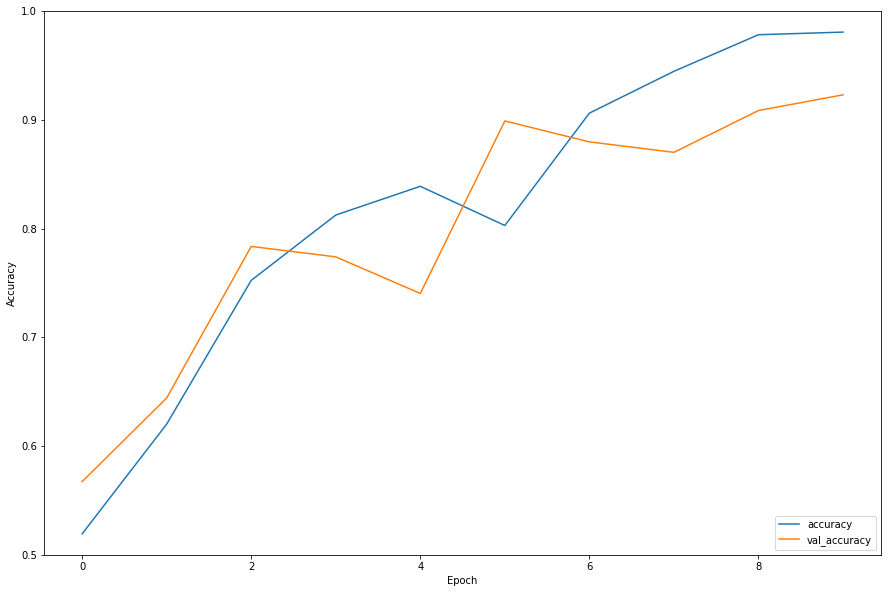

7/7 - 0s - loss: 0.2215 - accuracy: 0.9231 - 117ms/epoch - 17ms/step
test lost:0.2214985191822052, accuracy of test:0.9230769276618958


In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# calculating the accuracy of the model with the test samples
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'test lost:{test_loss}, accuracy of test:{test_acc}')

###1. Does the model overfit?
No, as we can see above the model achieved high accuracy in both the train and test images.

###2. What's the effect of batch size? In general, do you see this effect in the current task?
To test the effect of different batch sizes we fitted the model with different sizes from [100, 200, 300, 400].

the result show that the best accuracy was achieved when batch size is 200 but the different is not much around 1% improvement. you can view the result below.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'test lost:{test_loss}, accuracy of test:{test_acc}')

Epoch 1/10
3/3 [==============================] - 1s 230ms/step - loss: 0.0869 - accuracy: 0.9856 - val_loss: 0.1962 - val_accuracy: 0.9231
Epoch 2/10
3/3 [==============================] - 1s 214ms/step - loss: 0.0729 - accuracy: 0.9928 - val_loss: 0.1702 - val_accuracy: 0.9327
Epoch 3/10
3/3 [==============================] - 1s 219ms/step - loss: 0.0673 - accuracy: 0.9952 - val_loss: 0.1679 - val_accuracy: 0.9375
Epoch 4/10
3/3 [==============================] - 1s 222ms/step - loss: 0.0625 - accuracy: 0.9976 - val_loss: 0.1818 - val_accuracy: 0.9279
Epoch 5/10
3/3 [==============================] - 1s 211ms/step - loss: 0.0630 - accuracy: 0.9904 - val_loss: 0.1895 - val_accuracy: 0.9279
Epoch 6/10
3/3 [==============================] - 1s 218ms/step - loss: 0.0565 - accuracy: 0.9928 - val_loss: 0.1579 - val_accuracy: 0.9423
Epoch 7/10
3/3 [==============================] - 1s 217ms/step - loss: 0.0555 - accuracy: 0.9976 - val_loss: 0.1535 - val_accuracy: 0.9471
Epoch 8/10
3/3 [====

###3. What was the optimal optimizer? Explain.
according to keras documentation the following optimizers are available:

-    SGD
-   RMSprop
-    Adam
-    AdamW
-    Adadelta
-    Adagrad
-    Adamax
-    Adafactor
-    Nadam
-    Ftrl

in practice AdamW, Adafactor does not work. we compile the model with each optimizer and fit to the given train images and calculated the accuracy on the test images. 
below you can see the graph of optimizer and the result.

SGD
Epoch 1/10
13/13 [==============================] - 1s 85ms/step - loss: 1.2022 - accuracy: 0.6755 - val_loss: 0.5950 - val_accuracy: 0.7837
Epoch 2/10
13/13 [==============================] - 1s 72ms/step - loss: 0.4440 - accuracy: 0.8582 - val_loss: 0.3369 - val_accuracy: 0.8702
Epoch 3/10
13/13 [==============================] - 1s 69ms/step - loss: 0.2311 - accuracy: 0.9375 - val_loss: 0.2104 - val_accuracy: 0.9087
Epoch 4/10
13/13 [==============================] - 1s 73ms/step - loss: 0.1395 - accuracy: 0.9712 - val_loss: 0.1793 - val_accuracy: 0.9038
Epoch 5/10
13/13 [==============================] - 1s 70ms/step - loss: 0.1175 - accuracy: 0.9663 - val_loss: 0.2217 - val_accuracy: 0.9038
Epoch 6/10
13/13 [==============================] - 1s 72ms/step - loss: 0.0832 - accuracy: 0.9784 - val_loss: 0.5345 - val_accuracy: 0.7788
Epoch 7/10
13/13 [==============================] - 1s 71ms/step - loss: 0.0719 - accuracy: 0.9832 - val_loss: 0.1398 - val_accuracy: 0.9231
Epoch 8/1

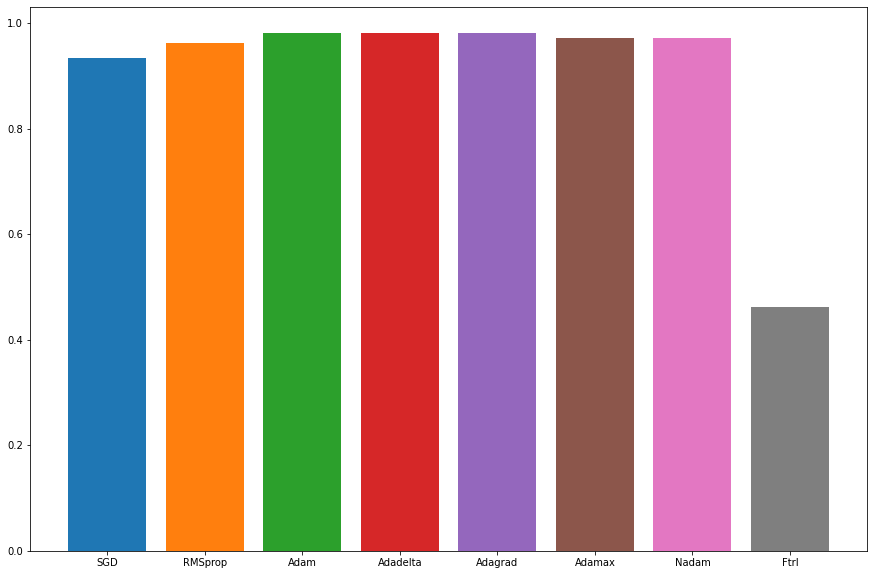

In [ ]:
optimizers = [
    'SGD',
    'RMSprop',
    'Adam',
    'Adadelta',
    'Adagrad',
    'Adamax',
    'Nadam',
    'Ftrl'
]

optimal = ''
index = np.arange(len(optimizers)) + 0.3
bar_width = 0.4

for i,optimizer in enumerate(optimizers):
  print(optimizer)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
  test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
  plt.bar(index[i], test_acc)

plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(index, optimizers)
plt.show()

**Answer:** as we can see from the graph above the best optimizers were Adam, Adadelta and Adagrad with accuracy of 0.9808